<a href="https://colab.research.google.com/github/gabbypaola/DATA604/blob/main/G_Martinez_chap17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 17

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# check if the libraries we need are installed

try:
    import pint
except ImportError:
    !pip install pint
    import pint
    
try:
    from modsim import *
except ImportError:
    !pip install modsimpy
    from modsim import *

### Data

We have data from Pacini and Bergman (1986), "MINMOD: a computer program to calculate insulin sensitivity and pancreatic responsivity from the frequently sampled intravenous glucose tolerance test", *Computer Methods and Programs in Biomedicine*, 23: 113-122..

In [2]:
import os

filename = 'glucose_insulin.csv'

if not os.path.exists(filename):
    !wget https://raw.githubusercontent.com/AllenDowney/ModSimPy/master/data/glucose_insulin.csv

In [3]:
data = pd.read_csv(filename, index_col='time')

Here's what the glucose time series looks like.

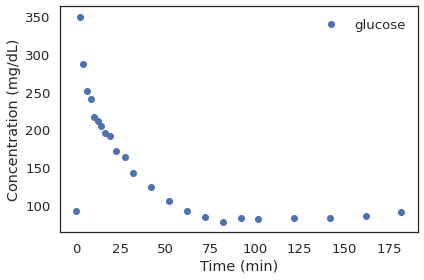

In [4]:
plot(data.glucose, 'bo', label='glucose')
decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/dL)')

And the insulin time series.

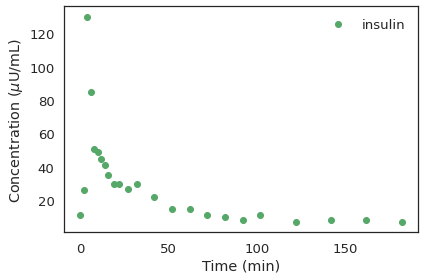

In [5]:
plot(data.insulin, 'go', label='insulin')
decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')

For the book, I put them in a single figure, using `subplot`

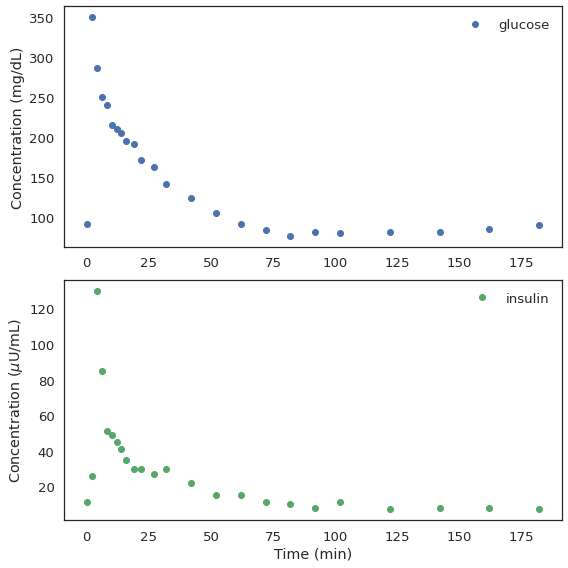

In [6]:
subplot(2, 1, 1)
plot(data.glucose, 'bo', label='glucose')
decorate(ylabel='Concentration (mg/dL)')

subplot(2, 1, 2)
plot(data.insulin, 'go', label='insulin')
decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')



### Interpolation

We have measurements of insulin concentration at discrete points in time, but we need to estimate it at intervening points.  We'll use `interpolate`, which takes a `Series` and returns a function:

The return value from `interpolate` is a function.

In [7]:
I = interpolate(data.insulin)

We can use the result, `I`, to estimate the insulin level at any point in time.

In [8]:
I(7)

68.0

`I` can also take an array of time and return an array of estimates:

In [9]:
t_0 = get_first_label(data)
t_end = get_last_label(data)
ts = linrange(t_0, t_end, endpoint=True)
I(ts)
type(ts)

numpy.ndarray

Here's what the interpolated values look like.

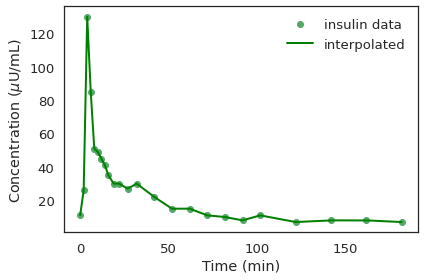

In [10]:
plot(data.insulin, 'go', label='insulin data')
plot(ts, I(ts), color='green', label='interpolated')

decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')



**Exercise:** [Read the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) of `scipy.interpolate.interp1d`.  Pass a keyword argument to `interpolate` to specify one of the other kinds of interpolation, and run the code again to see what it looks like. 

In [11]:
# Solution goes here
# default 'kind' is linear
I_2 = interpolate(data.insulin, kind = 'nearest')

In [12]:
t_0 = get_first_label(data)
t_end = get_last_label(data)
ts = linrange(t_0, t_end, endpoint=True)
I_2(ts)

array([ 11.,  11.,  26.,  26., 130., 130.,  85.,  85.,  51.,  51.,  49.,
        49.,  45.,  45.,  41.,  41.,  35.,  35.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  27.,  27.,  27.,  27.,  27.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  22.,  22.,  22.,  22.,  22.,  22.,
        22.,  22.,  22.,  22.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
        15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
        15.,  15.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,
        11.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
         8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,  11.,
        11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,  11.,
        11.,  11.,  11.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,
         7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,
         7.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,
         8.,   8.,   8.,   8.,   8.,   8.,   8.,   

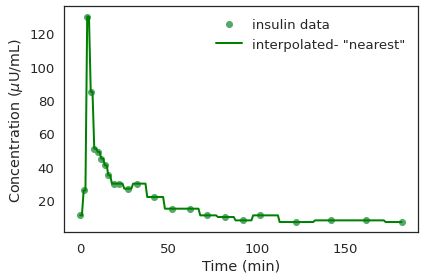

In [13]:
plot(data.insulin, 'go', label='insulin data')
plot(ts, I_2(ts), color='green', label='interpolated- "nearest"')

decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')


**Exercise:** Interpolate the glucose data and generate a plot, similar to the previous one, that shows the data points and the interpolated curve evaluated at the time values in `ts`.

In [14]:
# Solution goes here

G = interpolate(data.glucose, kind='quadratic')

In [15]:
t_0 = get_first_label(data)
t_end = get_last_label(data)
ts = linrange(t_0, t_end, endpoint=True)
G(ts)

array([ 92.        , 268.56796325, 350.        , 336.29611026,
       287.        , 261.65537517, 251.        , 245.77163873,
       240.        , 227.71479243, 216.        , 211.93960671,
       211.        , 208.64756734, 205.        , 200.17498924,
       196.        , 194.30249722, 194.37804189, 192.        ,
       186.46393254, 178.44564829, 172.        , 167.80279645,
       165.85403765, 165.7337864 , 164.92241958, 163.        ,
       159.96652767, 155.82200258, 150.7775403 , 146.09983425,
       142.        , 138.47803755, 135.5339469 , 133.16772804,
       131.37938099, 130.16890573, 129.18491801, 128.07603358,
       126.84225244, 125.48357458, 124.        , 122.39152871,
       120.6581607 , 118.79989598, 116.81673455, 114.70867639,
       112.58392413, 110.55068036, 108.60894508, 106.75871829,
       105.        , 103.3327902 , 101.75708889, 100.27289607,
        98.88021174,  97.57903591,  96.3515372 ,  95.17988426,
        94.06407707,  93.00411566,  92.        ,  91.05

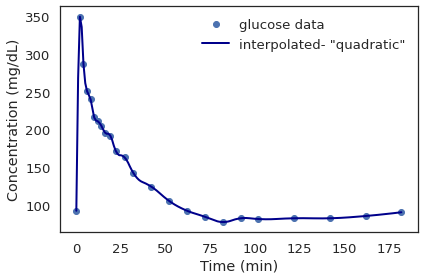

In [16]:
plot(data.glucose, 'bo', label='glucose data')
plot(ts, G(ts), color='darkblue', label='interpolated- "quadratic"')

decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/dL)')

### Under the hood

In [17]:
source_code(interpolate)

def interpolate(series, **options):
    """Creates an interpolation function.

    series: Series object
    options: any legal options to scipy.interpolate.interp1d

    returns: function that maps from the index of the series to values
    """
    if has_nan(series.index):
        msg = """The Series you passed to interpolate contains
                 NaN values in the index, which would result in
                 undefined behavior.  So I'm putting a stop to that."""
        raise ValueError(msg)

    if not is_strictly_increasing(series.index):
        msg = """The Series you passed to interpolate has an index
                 that is not strictly increasing, which would result in
                 undefined behavior.  So I'm putting a stop to that."""
        raise ValueError(msg)

    # make the interpolate function extrapolate past the ends of
    # the range, unless `options` already specifies a value for `fill_value`
    underride(options, fill_value="extrapolate")

    # call 